In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,7)
plt.style.use('bmh')
from datetime import timedelta
from keras.models import *
from keras.layers import *
from sklearn.preprocessing import *
import seaborn as sns
from keras.callbacks import *
from sklearn.metrics import *

In [2]:
# Importing Training Set
df = pd.read_csv('C:\\Users\\moham\\OneDrive - De Montfort University\\Final Project\\Master_Thesis\\Dataset\\QBDaily.csv', index_col=0, parse_dates=True)

# df = df[['Gas', 'Electric', 'Water', 'temp', 'dew_point', 'pressure', 'humidity', 'wind_speed']]

In [3]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [4]:
values = df.values

# normalize features
scaler = MinMaxScaler()
scaled = scaler.fit_transform(values)

In [5]:
# specify the number of lag hours
n_hours = 6
n_features = 8

In [6]:
# frame as supervised learning
reframed = series_to_supervised(scaled, n_hours, 1)
reframed.head()

,var1(t-6),var2(t-6),var3(t-6),var4(t-6),var5(t-6),var6(t-6),var7(t-6),var8(t-6),var1(t-5),var2(t-5),...,var7(t-1),var8(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t)
6,0.519084,0.235732,0.270758,0.324647,0.263217,0.525839,0.408526,0.379643,0.892127,0.191680,...,0.712256,0.563152,0.534297,0.000086,0.149846,0.379716,0.378105,0.326052,0.567496,0.330505
7,0.892127,0.191680,0.266747,0.290795,0.236367,0.734683,0.471581,0.356969,0.912357,0.190124,...,0.567496,0.330505,0.914167,0.143997,0.272058,0.371947,0.427891,0.000000,0.732682,0.646509
8,0.912357,0.190124,0.264412,0.313279,0.307163,0.819393,0.579929,0.296808,0.892247,0.128736,...,0.732682,0.646509,0.906694,0.146831,0.272697,0.426268,0.433584,0.175812,0.534636,0.643309
9,0.892247,0.128736,0.263045,0.471553,0.472000,0.677677,0.484014,0.412157,0.876092,0.128636,...,0.534636,0.643309,0.892643,0.195267,0.277479,0.401326,0.309789,0.358018,0.281528,0.820837
10,0.876092,0.128636,0.253746,0.422466,0.374745,0.527437,0.397869,0.487237,0.550268,0.000039,...,0.281528,0.820837,0.890724,0.158580,0.260688,0.405812,0.437744,0.521577,0.631439,0.395987


In [7]:
# newpath = 'C:\\Users\\moham\\OneDrive - De Montfort University\\Final Project\\Master_Thesis\\Metrics'
# if not os.path.exists(newpath):
#     os.makedirs(newpath)

In [8]:
# rmse_txt = [0]
# mse_txt = [0]
# mae_txt = [0]
# rs_txt = [0]

# folds = []

# r_lista = []

# trial = [24, 96, 168]

# for i in trial:
#     folds.append(i)

#     # split into train and test sets
#     values = reframed.values
#     n_train_hours = 365 * i
#     train = values[:n_train_hours, :]
#     test = values[n_train_hours:, :]

#     # split into input and outputs
#     train_X, train_y = train[:, :-1], train[:, -1]
#     test_X, test_y = test[:, :-1], test[:, -1]

#     # reshape input to be 3D [samples, timesteps, features]
#     train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
#     test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


#     # design network
#     model = Sequential()
#     model.add(LSTM(50, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2])))
#     model.add(Dense(1))

# # Compile
#     es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
#     loss = 'mean_squared_error'
#     model.compile(loss=loss, optimizer='adam')

#     # fit network
#     history = model.fit(train_X, train_y, epochs=50, 
#                         validation_data=(test_X, test_y), 
#                         verbose=0, shuffle=False, callbacks=[es])

#     # plot history
#     plt.plot(history.history['loss'])
#     plt.plot(history.history['val_loss'])
#     plt.legend(['train', 'test'], loc='upper right')
#     plt.xticks(rotation='horizontal')
#     plt.yticks(rotation='horizontal')
#     plt.savefig(newpath + '\\Loss_' + loss + '_Fold_' + str(i) + '.PNG')

#     # make a prediction
#     yhat = model.predict(test_X)
#     test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

#     # invert scaling for forecast
#     inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
#     inv_yhat = scaler.inverse_transform(inv_yhat)
#     inv_yhat = inv_yhat[:,0]

#     # invert scaling for actual
#     test_y = test_y.reshape((len(test_y), 1))
#     inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
#     inv_y = scaler.inverse_transform(inv_y)
#     inv_y = inv_y[:,0]

#     # plt.plot(inv_y.flatten(), marker='.', label='Actual Data')
#     # plt.plot(inv_yhat.flatten(), marker='v', color='r', label='Predicted Data')
#     # plt.title('Predicted vs Testing', fontweight='bold')
#     # plt.legend(shadow=True)
#     # plt.xticks(rotation='horizontal')
#     # plt.yticks(rotation='horizontal')
#     # plt.xlabel('Data points',fontsize=18, ha='center')
#     # plt.ylabel('kW',fontsize=18, ha='center')
#     # plt.title('Energy Consumption Prediction Validation Data',fontsize=25, ha='center')
#     # plt.tick_params(labelsize=18)
#     # plt.savefig(newpath+ '\\Validation_' + loss + '_Fold_' + str(i) + '.PNG')


#     # calculate RMSE
#     rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
#     mse = mean_squared_error(inv_y, inv_yhat)
#     mae = mean_absolute_error(inv_y, inv_yhat)
#     rs = r2_score(inv_y, inv_yhat)*100

#     r_lista.append([round(rmse, 3), round(mse, 3), round(mae, 3), round(rs, 3)])

#     print('Good Model','RMSE:', round(rmse, 3), 'R^2:', round(rs, 3), 'MAE:', round(mae, 3), 'MSE:', round(mse, 3))

# rmse_txt[0] = r_lista[0][0]
# mse_txt[0]  = r_lista[0][1]
# mae_txt[0]  = r_lista[0][2]
# rs_txt[0]   = r_lista[0][3]

# for i in range(1,len(r_lista)):
#     rmse_txt.append(r_lista[i][0])
#     mse_txt.append(r_lista[i][1])
#     mae_txt.append(r_lista[i][2])
#     rs_txt.append(r_lista[i][3])

# rmse_avg = sum(rmse_txt)/len(r_lista)
# mse_avg = sum(mse_txt)/len(r_lista)
# mae_avg = sum(mae_txt)/len(r_lista)
# rs_avg = sum(rs_txt)/len(r_lista)

# text = newpath + '.txt'
# f= open(text,"w+")
# f.write(str(['RMSE AVG','MSE AVG','MAE AVG','R2 AVG']))
# f.write('\n')
# f.write(str([rmse_avg, mse_avg, mae_avg, rs_avg]))
# f.write('\n')
# f.write('\n')
# f.write(str(['RMSE: ', rmse_txt[:]]))
# f.write('\n')
# f.write(str(['MSE: ', mse_txt[:]]))
# f.write('\n')
# f.write(str(['MAE: ', mae_txt[:]]))
# f.write('\n')
# f.write(str(['R2: ', rs_txt[:]]))
# f.write('\n')
# f.close()

In [9]:
# split into train and test sets
values = reframed.values
n_train_hours = 365 * 5
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]

print(train_X.shape, len(train_X), train_y.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1825, 48) 1825 (1825,)
(1825, 6, 8) (1825,) (3281, 6, 8) (3281,)


In [10]:
# design network
# model = Sequential()
# model.add(LSTM(50, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
# model.add(LSTM(50, activation='relu', return_sequences=True))
# model.add(LSTM(50, activation='relu', return_sequences=True))
# model.add(LSTM(50, activation='relu', return_sequences=True))
# model.add(LSTM(50, activation='relu', return_sequences=True))
# model.add(LSTM(50, activation='relu', return_sequences=True))
# model.add(LSTM(50, activation='relu', return_sequences=False))
# # model.add(Dropout(0.01))
# model.add(Dense(1))
# model.compile(loss='mse', optimizer='adam')

model = Sequential()
model.add(Bidirectional(LSTM(units=50, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True)))
model.add(Bidirectional(LSTM(units=50, activation='relu', return_sequences=True)))
model.add(Bidirectional(LSTM(units=50, activation='relu', return_sequences=True)))
model.add(Bidirectional(LSTM(units=50, activation='relu', return_sequences=True)))
model.add(Bidirectional(LSTM(units=50, activation='relu', return_sequences=True)))
model.add(Bidirectional(LSTM(units=50, activation='relu', return_sequences=True)))
model.add(Bidirectional(LSTM(units=50, activation='relu')))
# model.add(Dropout(rate=0.2))
model.add(Dense(units=1))

# Compiling the Neural Network
model.compile(optimizer='adam', loss='mean_squared_error')

In [11]:
%%time
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)

# fit network
history = model.fit(train_X, train_y, epochs=50, validation_data=(test_X, test_y), verbose=1, shuffle=False, callbacks=[es])

Epoch 1/50
58/58 [==============================] - 21s 66ms/step - loss: 0.1348 - val_loss: 0.0281
Epoch 2/50
58/58 [==============================] - 3s 45ms/step - loss: 0.0208 - val_loss: 0.0233
Epoch 3/50
58/58 [==============================] - 3s 44ms/step - loss: 0.0218 - val_loss: 0.0271
Epoch 4/50
58/58 [==============================] - 2s 41ms/step - loss: 0.0227 - val_loss: 0.0319
Epoch 5/50
58/58 [==============================] - 2s 37ms/step - loss: 0.0226 - val_loss: 0.0319
Epoch 6/50
58/58 [==============================] - 2s 38ms/step - loss: 0.0228 - val_loss: 0.0294
Epoch 7/50
58/58 [==============================] - 2s 37ms/step - loss: 0.0230 - val_loss: 0.0268
Epoch 8/50
58/58 [==============================] - 2s 37ms/step - loss: 0.0232 - val_loss: 0.0247
Epoch 9/50
58/58 [==============================] - 2s 37ms/step - loss: 0.0234 - val_loss: 0.0238
Epoch 10/50
58/58 [==============================] - 2s 37ms/step - loss: 0.0228 - val_loss: 0.0230
Epoch 11

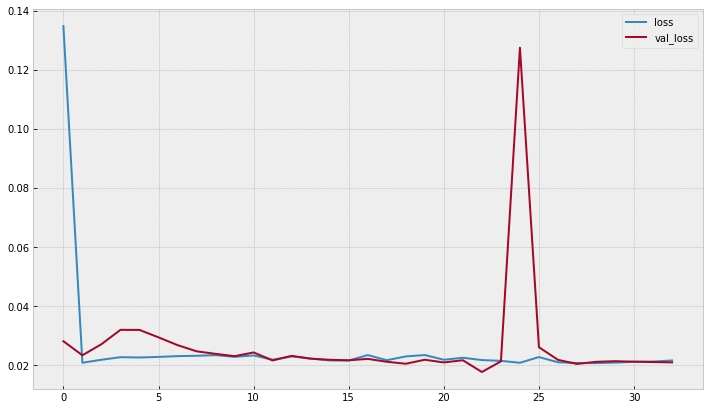

In [12]:
# plot history
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import *

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))

# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -7:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -7:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
# rmse = np.sqrt(mean_squared_error(test_y, yhat))
# mse = mean_squared_error(test_y, yhat)
# mae = mean_absolute_error(test_y, yhat)
# r2 = r2_score(test_y, yhat)


rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
mse = mean_squared_error(inv_y, inv_yhat)
mae = mean_absolute_error(inv_y, inv_yhat)
r2 = r2_score(inv_y, inv_yhat)

print('Test RMSE: %.3f' % rmse)
print('Test MSE: %.3f' % mse)
print('Test MAE: %.3f' % mae)
print('Test R2: %.3f' % r2)

Test RMSE: 11.287
Test MSE: 127.395
Test MAE: 9.374
Test R2: 0.079


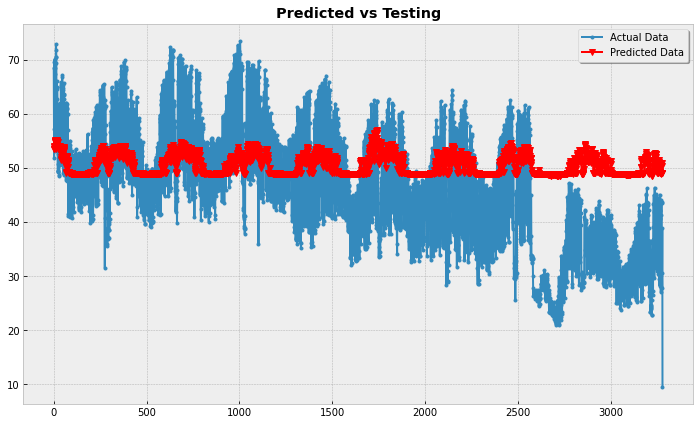

In [14]:
plt.plot(inv_y.flatten(), marker='.', label='Actual Data')
plt.plot(inv_yhat.flatten(), marker='v', color='r', label='Predicted Data')
plt.title('Predicted vs Testing', fontweight='bold')
plt.legend(shadow=True);